In [2]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [7]:
cat4 = cv2.imread('CATS_DOGS/CATS_DOGS/train/CAT/4.jpg')

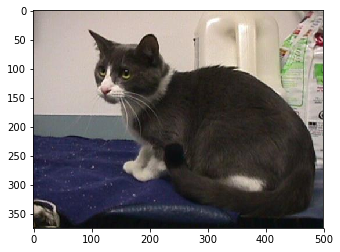

In [8]:
cat4 = cv2.cvtColor(cat4,cv2.COLOR_BGR2RGB)
plt.imshow(cat4)

In [9]:
cat4.shape

(375, 500, 3)

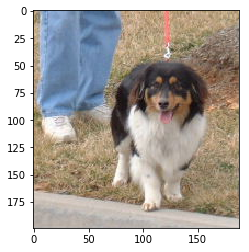

In [10]:
dog = cv2.imread('CATS_DOGS/CATS_DOGS/train/DOG/2.jpg')
dog = cv2.cvtColor(dog,cv2.COLOR_BGR2RGB)
plt.imshow(dog)

In [11]:
dog.shape

(199, 188, 3)

In [12]:
from keras.preprocessing.image import ImageDataGenerator

In [14]:
image_gen = ImageDataGenerator(rotation_range=30,width_shift_range=0.1,height_shift_range=0.1,rescale=1/255,\
shear_range=0.20,zoom_range=0.20,horizontal_flip=True,fill_mode='nearest')                             

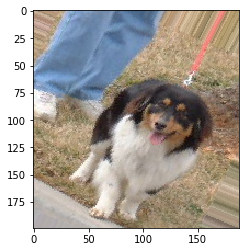

In [18]:
plt.imshow(image_gen.random_transform(dog))

In [19]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Activation,Dropout

In [20]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)             0         
__________

In [31]:
batch_size = 16

train_img_generator = image_gen.flow_from_directory('CATS_DOGS/CATS_DOGS/train/',\
target_size=(150,150),batch_size=batch_size,class_mode='binary')

Found 18743 images belonging to 2 classes.


In [32]:
test_img_generator = image_gen.flow_from_directory('CATS_DOGS/CATS_DOGS/test/',\
target_size=(150,150),batch_size=batch_size,class_mode='binary')

Found 6251 images belonging to 2 classes.


In [33]:
training_img_generator.class_indices

{'CAT': 0, 'DOG': 1}

In [36]:
result = model.fit_generator(train_img_generator,epochs=5,steps_per_epoch=150,validation_data=test_img_generator,validation_steps=12)

Epoch 1/5
150/150 [==============================] - 151s - loss: 0.6918 - acc: 0.5250 - val_loss: 0.6837 - val_acc: 0.5573

In [38]:
result.history['acc']

[0.525, 0.545, 0.5595833333333333, 0.5875, 0.57125]

In [39]:
model.save('MyModel.h5')

In [49]:
dog_file = 'CATS_DOGS/CATS_DOGS/test/DOG/10005.jpg'

In [50]:
from keras.preprocessing import image

In [51]:
dog_image = image.load_img(dog_file,target_size=(150,150))
dog_image = image.img_to_array(dog_image)
dog_image.shape


(150, 150, 3)

In [52]:
import numpy as np

In [53]:
dog_image = np.expand_dims(dog_image,axis=0)
dog_image.shape

(1, 150, 150, 3)

In [54]:
dog_image = dog_image / 255
model.predict_classes(dog_image)

1/1 [==============================] - 0s


array([[0]])